In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

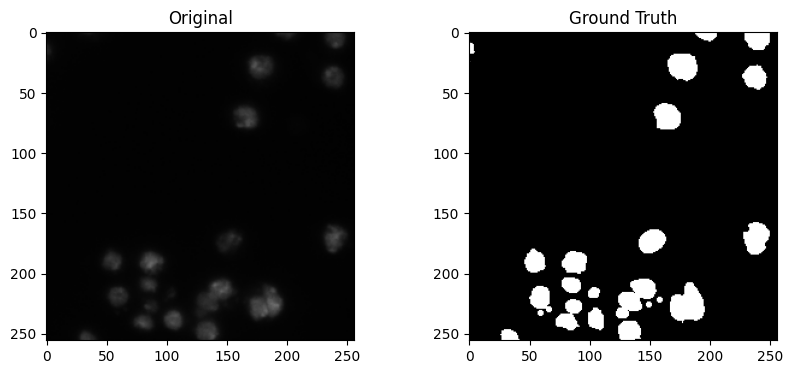

In [2]:
sample_path = "/kaggle/input/data-science-bowl-2018-competition-merged-mask/data science bowl 2018/stage1_train 2/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552"

image_path = os.path.join(sample_path, "images","00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png")
mask_folder = os.path.join(sample_path, "masks")

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# as in dataset, we have 1 mask for single object so, with below function we merge all objects

gt_mask = np.zeros(gray.shape, dtype=np.uint8)

for file in os.listdir(mask_folder):

    mask_path = os.path.join(mask_folder, file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    gt_mask = np.maximum(gt_mask, mask)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gt_mask, cmap='gray')
plt.title("Ground Truth")

plt.show()

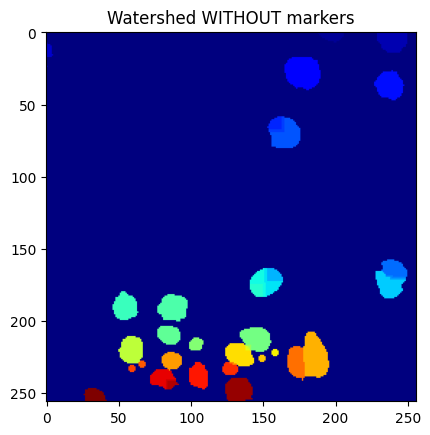

In [3]:

from skimage.segmentation import watershed

thresh = gt_mask
distance = cv2.distanceTransform(thresh, cv2.DIST_L2, cv2.DIST_MASK_PRECISE) # cv2.DIST_MASK_PRECISE - for precise mask
labels_no_marker = watershed(-distance, mask=thresh)

plt.imshow(labels_no_marker, cmap='jet')
plt.title("Watershed WITHOUT markers")
plt.show()


Number of nuclei detected: 24


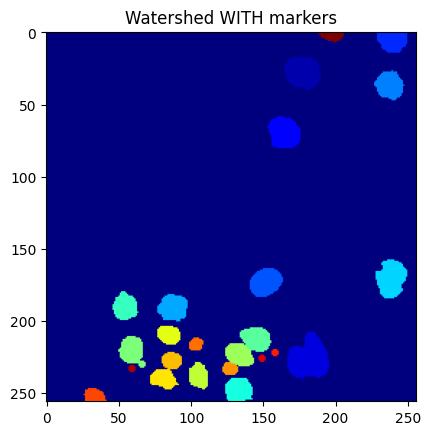

In [4]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

coords = peak_local_max(distance,
                        min_distance=5,
                        labels=thresh)

print("Number of nuclei detected:", len(coords))

markers = np.zeros(distance.shape, dtype=int)

for i, (r, c) in enumerate(coords): # to label for each nuclie
    markers[r, c] = i + 1

labels_marker = watershed(-distance,
                          markers,
                          mask=thresh)

plt.imshow(labels_marker, cmap='jet')
plt.title("Watershed WITH markers")
plt.show()

min_distance: 1  Detected nuclei: 49
min_distance: 3  Detected nuclei: 28
min_distance: 5  Detected nuclei: 24
min_distance: 8  Detected nuclei: 19
min_distance: 12  Detected nuclei: 15
min_distance: 16  Detected nuclei: 13


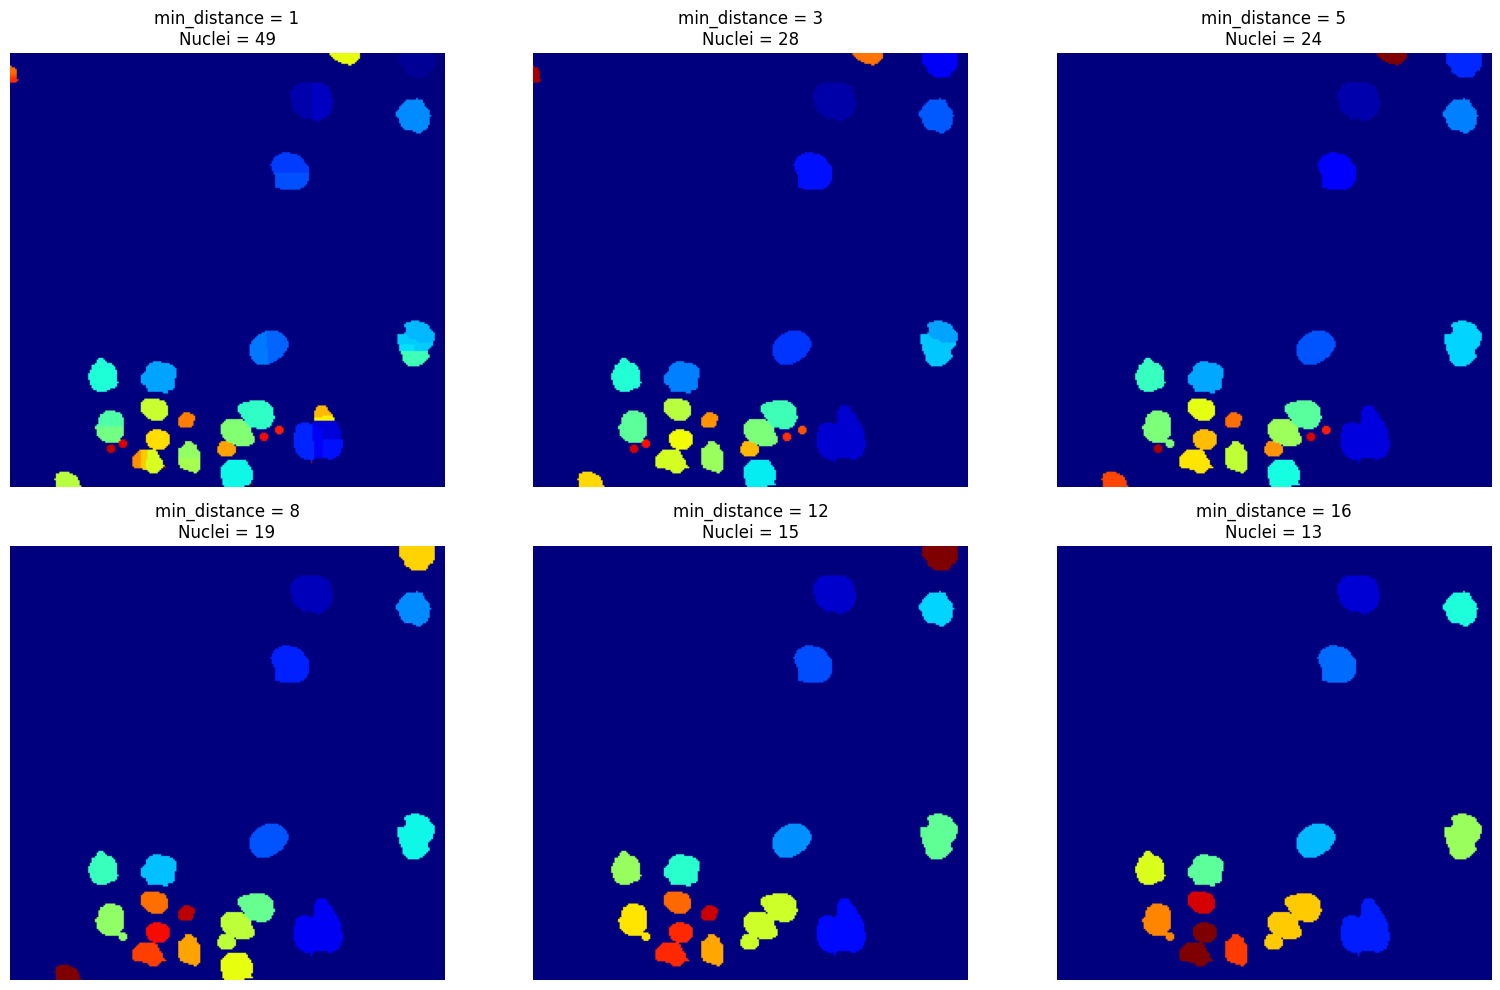

In [5]:

min_distance_values = [1, 3, 5, 8, 12, 16]

plt.figure(figsize=(16,10))
for i, d in enumerate(min_distance_values):
    
    coords = peak_local_max(distance,
                            min_distance=d,
                            labels=thresh)

    markers = np.zeros(distance.shape, dtype=int)
    
    for j, (r, c) in enumerate(coords):
        markers[r, c] = j + 1
    labels = watershed(-distance,
                       markers,
                       mask=thresh)

    print("min_distance:", d,
          " Detected nuclei:", len(coords))
    
    plt.subplot(2, 3, i+1)
    plt.imshow(labels, cmap='jet')
    plt.title(f"min_distance = {d}\nNuclei = {len(coords)}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**with different distance to analyse changes**
min dist increasen no. of nuclie decreases and visa versa.

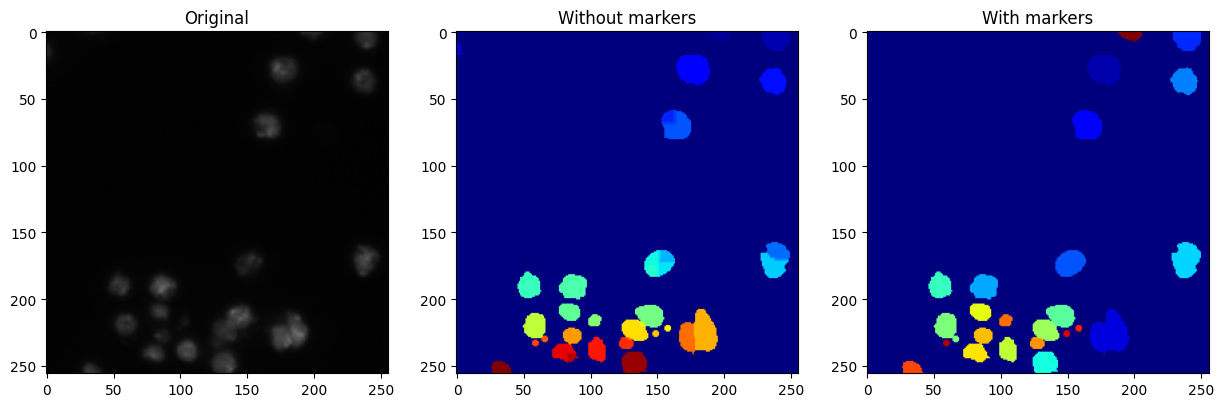

Without markers nuclei: 43
With markers nuclei: 24


In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(labels_no_marker, cmap='jet')
plt.title("Without markers")

plt.subplot(1,3,3)
plt.imshow(labels_marker, cmap='jet')
plt.title("With markers")

plt.show()

print("Without markers nuclei:",
      len(np.unique(labels_no_marker)) - 1)

print("With markers nuclei:",
      len(np.unique(labels_marker)) - 1)



**conclusion**

In this work, watershed segmentation was applied to separate touching nuclei using the Data Science Bowl 2018 dataset.

Watershed without markers detected 43 nuclei due to over-segmentation, while marker-controlled watershed detected 18 nuclei with better separation. This shows that marker-controlled watershed reduces over-segmentation and provides more accurate nuclei separation.